In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import export_text

## Data / Goal
The goal is to predicted customers which will buy a new car. The dataset has 400 observations. Independent variables = age, salary. Dependent variable = buy a car (1) or not buy a car (0).

In [43]:
dataset = pd.read_csv('data\Social_Network_Ads.csv')
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

## Exploratory Data Analysis
Correlation between age and salary is low, although very young people tend not to earn very high salaries. It also appears young people tend not to buy SUV's (probably because they are less likely to have offspring). There does not appear to be many outliers.

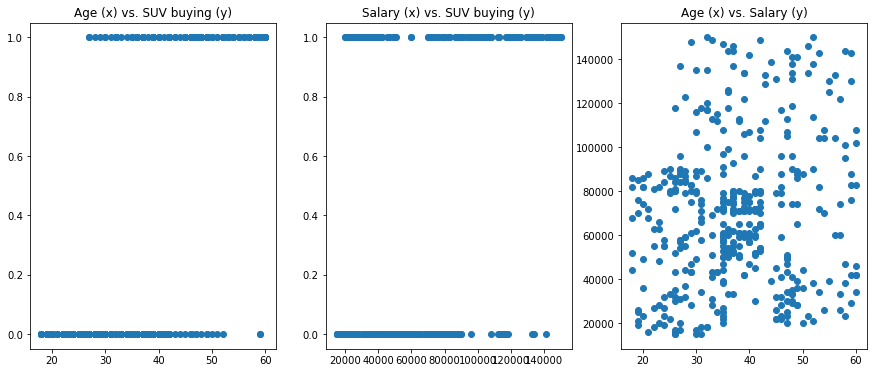

In [44]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize = (15,6))
ax1.scatter(X[:,0], y)
ax1.set_title("Age (x) vs. SUV buying (y)")
ax2.scatter(X[:,1], y)
ax2.set_title("Salary (x) vs. SUV buying (y)")
ax3.scatter(X[:,0],X[:,1])
ax3.set_title("Age (x) vs. Salary (y)")
plt.tight_layout
plt.show()

## DecisionTreeClassifier
The dataset is split 75% training, and 25% test. There is no need to standardize / normalize the data because a decision tree is is merely splitting up the feature space. The algorithm chooses to split a feature at a certain threshold by according to an 'impurity score' (or criterion). The impurity score for a split indicates how 'good' the split is at dividing the dataset. In this case we set a maximum depth of 5, which indicates a maximum of 5 splits. Decision Trees are good at learning non-linear relationships, is relatively inexpensive to compute, and easy to understand.


In [45]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25)
pipeline = Pipeline([('clf', DecisionTreeClassifier(criterion='entropy', max_depth=5))])
model = pipeline.fit(X_train, y_train)
predictions = model.predict(X_test)

## Results
The DecisionTree achieved 94% accuracy on the test data. DecisionTrees are easy to understand, and the splits can be observed. It was interesting to see the first split (most informative) was at 'age' = 44.5 (guess they have teenagers by then an need the space). Details on the exact splits are shown in tree_rules below. 

The images below show how the feature space ('age', 'salary') is classified. Notice how the decision tree always divides the feature space parallel to the axis. Broadly speaking, if someone is less than 45 years old, and earns less than $90k you will be classified as 'not going to buy an SUV'. 

In [46]:
cm = confusion_matrix(y_test,predictions)
print(cm)
accuracy_score(y_test,predictions)

[[56  6]
 [10 28]]


0.84

In [47]:
tree_rules = export_text(model.steps[0][1], feature_names=['Age','Salary'])
print(tree_rules)

|--- Age <= 42.50
|   |--- Salary <= 89500.00
|   |   |--- Age <= 36.50
|   |   |   |--- class: 0
|   |   |--- Age >  36.50
|   |   |   |--- Salary <= 67500.00
|   |   |   |   |--- class: 0
|   |   |   |--- Salary >  67500.00
|   |   |   |   |--- Salary <= 83500.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Salary >  83500.00
|   |   |   |   |   |--- class: 1
|   |--- Salary >  89500.00
|   |   |--- Salary <= 120000.00
|   |   |   |--- Salary <= 107500.00
|   |   |   |   |--- Salary <= 90500.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Salary >  90500.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- Salary >  107500.00
|   |   |   |   |--- Age <= 31.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Age >  31.00
|   |   |   |   |   |--- class: 0
|   |   |--- Salary >  120000.00
|   |   |   |--- class: 1
|--- Age >  42.50
|   |--- Salary <= 38500.00
|   |   |--- Salary <= 22500.00
|   |   |   |--- Age <= 46.50
|   |   |   |   |--- Age <= 45.50
|   | 

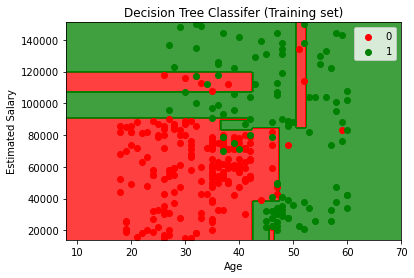

In [48]:
from matplotlib.colors import ListedColormap
X_set = X_train
y_set = y_train
X1, X2 = np.meshgrid(np.linspace(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, num=200),
                     np.linspace(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, num=200))
plt.contourf(X1, X2, model.predict((np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classifer (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

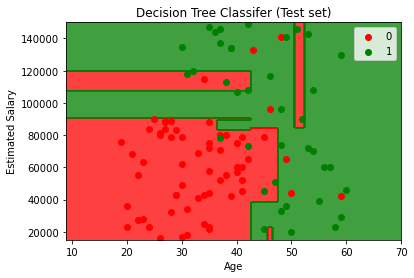

In [49]:
from matplotlib.colors import ListedColormap
X_set = X_test
y_set = y_test
X1, X2 = np.meshgrid(np.linspace(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, num=200),
                     np.linspace(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, num=200))
plt.contourf(X1, X2, model.predict((np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classifer (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()